This data project has been used as a take-home assignment in the recruitment process for the data science positions at NeuroTrade.

## Task
The task is to predict the day price direction of Amazon.com, Inc. (AMZN) stock.

The stock market is very complex and highly volatile. In order to be profitable, we do not need to predict the correct price, but rather, the price direction: whether it will be higher or lower than the price that is today. If we predict it to be higher, we might as well buy some stocks, else, we should probably sell.

Therefore, the target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
We have data for the period from `1997` up to year `2020` that we have split that into `training (1997-2016)`, `validation (2016-2018)` and `testing (2018-2020)` periods. The data is available in the `AMZN_train.csv, AMZN_val.csv and AMZN_test.csv` files, respectively.

Each dataset has the same format with the following 7 columns:

- `Date` - in format YYYY-MM-DD
- `Open` - stock price upon opening of an exchange
- `High` - the highest stock price on a given day
- `Low` - the lowest stock price on a given day
- `Close` - stock price at the end of a trading day
- `Adj Close` - [adjusted closing price](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) that takes into account corporate actions
- `Volume` - the amount of shares traded over the course of a trading day


## Practicalities
Define, train and evaluate a predictive model that takes as the input the data provided. Do not use external data for this project. You may use any algorithm of your choice or compare multiple models.

Make sure that the solution reflects your entire thought process - it is more important how the code is structured rather than the final metrics. You may assume that any model resulting in AUC > 0.515 will be enough. You are expected to spend no more than 3 hours working on this project.


# Solution

## Data Exploration
In our initial exploration, we will load the data sets and see what data attributes are available to us. We will also plot the variables, to see if we can find some trends in the data, and explore the possibility of engineering some additional features. We will do the data loading and analysis in pandas, so let us load that library and begin exploring.

In [1]:
import pandas as pd

In [3]:
# load the training set
df_train = pd.read_csv("datasets/AMZN_train.csv")

In [4]:
# (#rows, #columns)
df_train.shape

(4781, 7)

In [24]:
df_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0
4780,2016-05-13,714.640015,719.250000,706.510010,709.919983,709.919983,4763400,0


Pandas' `info()` method is really useful to get a quick peek at the column names, types, non-null counts, as well as the data set's memory size! We have mostly numerical columns (5 floats, 1 int) and an object column - the date. No null values at all, and just `261 KB` in size.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


The training data set consists of `4781 rows` and `7 columns`. These are presented above. In the cell below, we use the `describe()` method to get a quick overview of our data set.

In [7]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [8]:
# the above call to describe() works only for numerical columns
# 'Date' is an object and we need to call it separately
df_train["Date"].describe()

count           4781
unique          4781
top       1997-05-15
freq               1
Name: Date, dtype: object

In [9]:
# print the time range
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

We can plot the stock prices as a function of time. These plots are the first thing you see on any stock market.

In [10]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)

<AxesSubplot:xlabel='Date'>

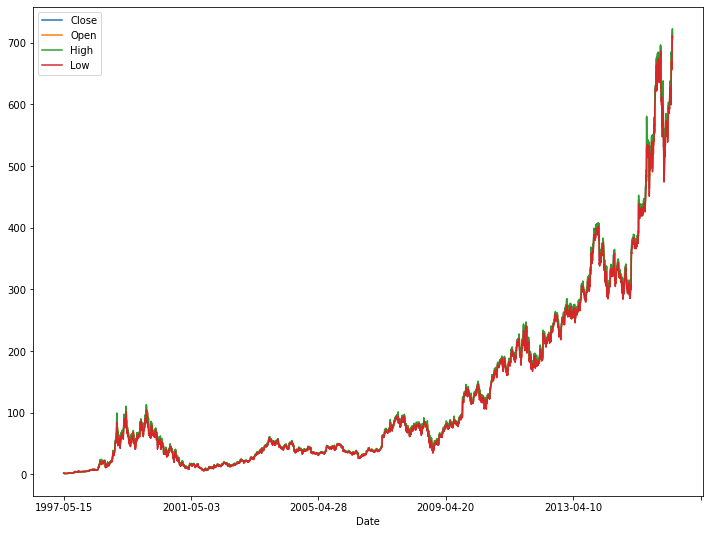

In [11]:
df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. We create a function to do that.

In [12]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

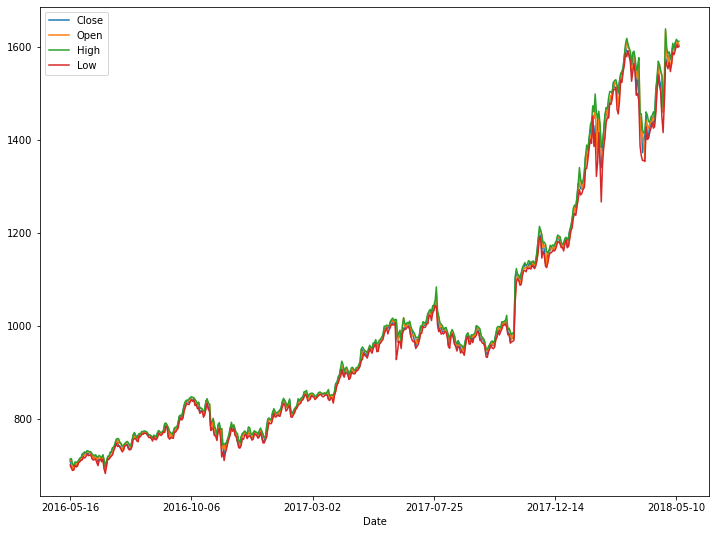

In [14]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("datasets/AMZN_val.csv")
analyse(df_val)

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

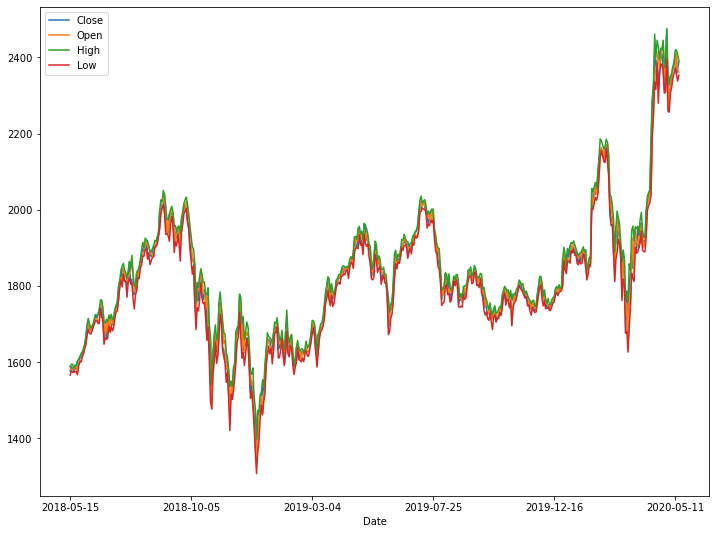

In [15]:
df_test = pd.read_csv("datasets/AMZN_test.csv")
analyse(df_test)

Once we have done our exploration of the data, we can move on to the predictive modeling part of the task. The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening prices one day in advance.

To achieve that, first, we will make sure that the data is sorted by the date. We can use the `sort_values` method and pass in the `Date` column as a parameter, sorting it in ascending order.

Next, we need to shift the DataFrame by one row / one day and compare the prices. Pandas has a method for doing exactly that, the shift method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a `True / False` result for each comparison. We want this to be presented as `1 / 0` for the machine learning models, so we will map it to type int. To store all of this information, we will create a new column, called `Target.`

In [16]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [17]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [18]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


Running the `value_counts` method on the Target column gives us the distribution. We have `2392 days` where the closing price is higher than the opening and `2389` where it is lower.

In [19]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

We are going to repeat the same procedure for the validation as well as the test set.

In [21]:
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [22]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

At this point, we can start building some machine learning models to predict the target variable. But, before we do that, it might be useful to engineer some additional features that may help us better predict the price direction. In the next section, we will explore some possibilities for doing feature engineering.

## Feature Engineering

We know that the stock prices are time-dependent and that the next day's price depends on prices (and many other things) from previous days.

We want to somehow take into account all the values in the last `n` days, capturing the trend, or the magnitude of price change.

A simple solution would be to calculate a moving average. With Pandas, we can use the rolling method to calculate moving averages. It provides us with an interface for sliding (in Pandas terminology - rolling) window calculations. The following cells calculate the `3- and 7-days` moving average, and add them as a feature into the data set.

Remember that we have our data sorted from before. If the data is not sorted by the date, the results from the `rolling()` method would be invalid.

In [26]:
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

In [27]:
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

Feature engineering can be simpler, we can just take the current day's price direction or the price range. Anything that comes to mind, that can be considered to be useful, should be tested and tried.

In [28]:
# current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [29]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

### Assignment
- `BBANDS`:               Bollinger Bands
- `EMA`:                  Exponential Moving Average
- `SMA`:                  Simple Moving Average
- `RSI`:                  Relative Strength Index
- `MACD`:                 Moving Average Convergence/Divergence

In [ ]:
# EMA
df_train["EMA"] = talib.EMA(close, 5)
df_val["EMA"] = talib.EMA(close, 5)
df_test["EMA"] = talib.EMA(close, 5)

In [ ]:
# SMA
df_train["SMA"] = talib.SMA(close, 5)
df_val["SMA"] = talib.SMA(close, 5)
df_test["SMA"] = talib.SMA(close, 5)

In [ ]:
# MACD
df_train["MACD"] = talib.MACD(close)
df_val["MACD"] = talib.MACD(close)
df_test["MACD"] = talib.MACD(close)

The next cell displays a sample of the data with the new features included.



In [30]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


## Classical Machine Learning Algorithms

The `sklearn` library is the most popular library in Python for implementing classical machine learning algorithms. We can use it to try and test a few of them. In the following cells we implement:

- Logistic regression
- Decision tree
- Random forest
- Gradient boosting ensemble
After fitting them to the training data, we are going to evaluate their performance on the validation set by estimating the `AUC` metric.

In [32]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [33]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

### Logistic Regression
We start our modeling phase with a `LogisticRegression` model.

In [34]:
# for reproducibility
RANDOM_SEED = 42

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


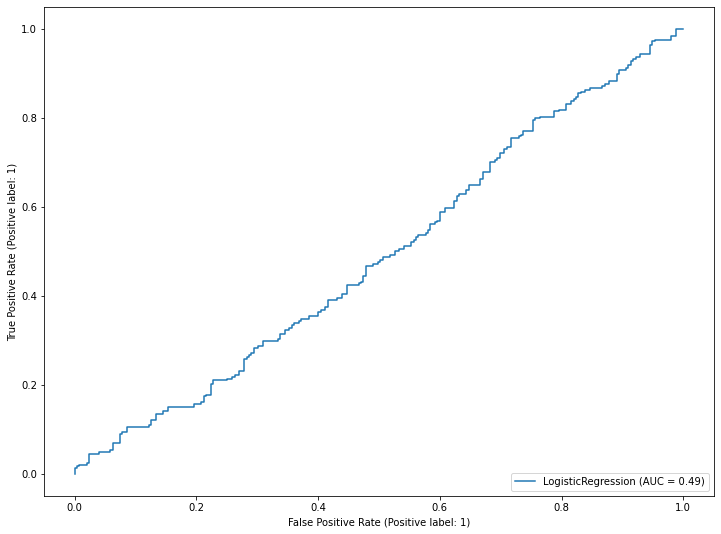

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression(verbose=0)

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

Logistic regression does not work well for this problem. Having `AUC < 0.5` means that the classifier is worse than just randomly guessing the output. Given that we are dealing with a very difficult problem, any `AUC > 0.5` would suffice for this task.

### Decision Tree

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


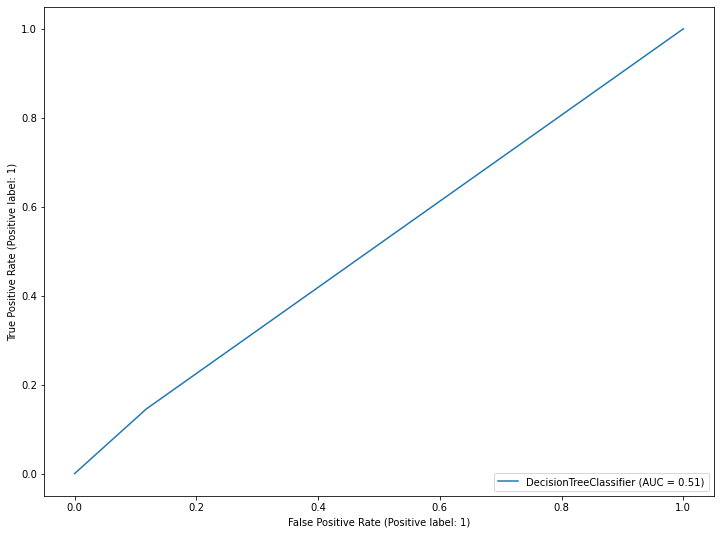

In [58]:
from sklearn.tree import DecisionTreeClassifier

# remember to use the random seed to be able to reproduce the same results
dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

The decision tree outperforms the logistic regression model by `0.02`, and its `AUC` is above `0.5!`

### Random Forest
Now we will try to use many decision trees, i.e., a forest. Random forest is an ensemble model that builds multiple decision trees, each with a different (random) sub-set of attributes.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


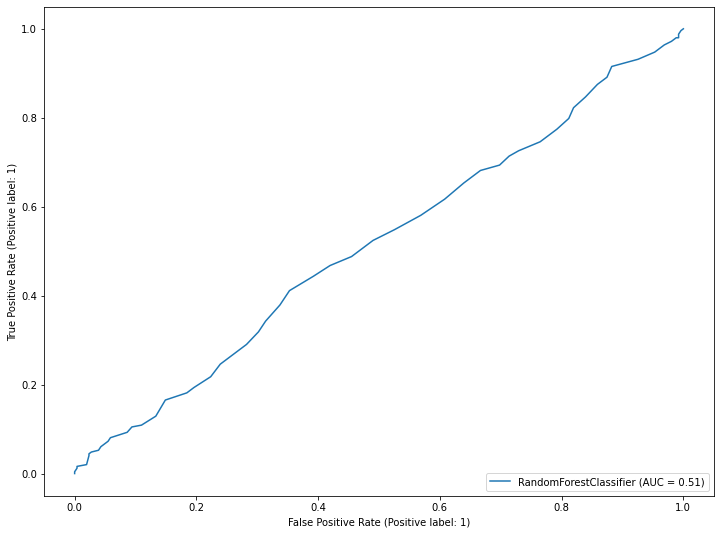

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.


### Gradient Boosting Ensemble

One last ensemble technique that we would like to try is gradient boosting. This algorithm sets up the stage for our next part, where we will try a deep learning approach to solve the problem.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


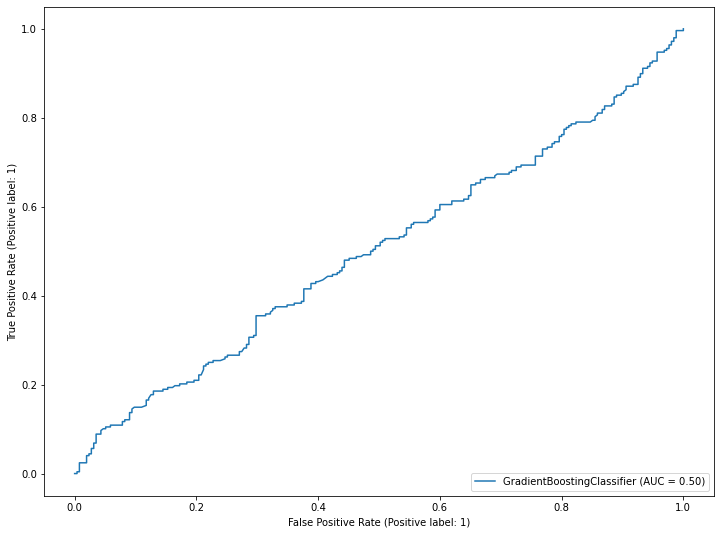

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED, learning_rate=0.02, n_estimators=90, max_depth=5)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

Indeed it does, the gradient boosting classifier outperform previous models and scored `0.55` AUC!

We find out that gradient boosting works best for this data set. In the next section, we will train a deep learning model with the aim to outperform the baseline set here, i.e., `AUC = 0.55.`

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


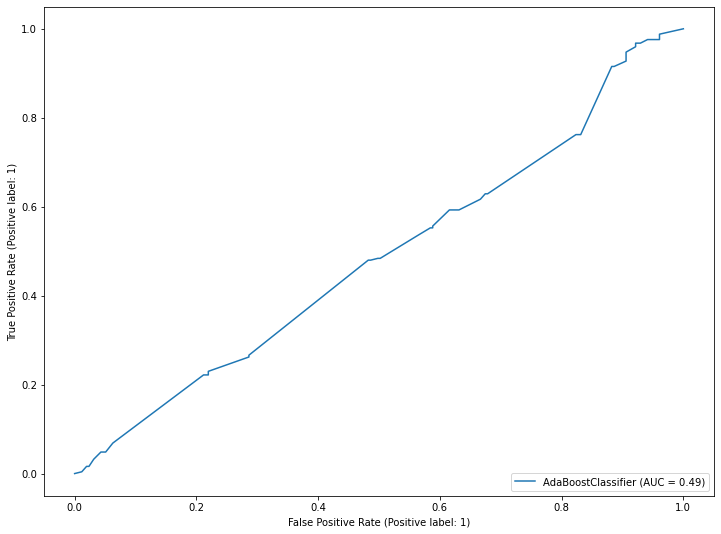

In [71]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=RANDOM_SEED, learning_rate=0.01, n_estimators=500)
adb.fit(X_train, y_train)

plot_roc_curve(adb, X_val, y_val)

## Grid Search 

Learning Rate:  0.1 Max Depth:  3 N_estimators:  80
Learning Rate:  0.1 Max Depth:  3 N_estimators:  100
Learning Rate:  0.1 Max Depth:  3 N_estimators:  50
Learning Rate:  0.1 Max Depth:  5 N_estimators:  80
Learning Rate:  0.1 Max Depth:  5 N_estimators:  100
Learning Rate:  0.1 Max Depth:  5 N_estimators:  50
Learning Rate:  0.1 Max Depth:  7 N_estimators:  80
Learning Rate:  0.1 Max Depth:  7 N_estimators:  100
Learning Rate:  0.1 Max Depth:  7 N_estimators:  50
Learning Rate:  1 Max Depth:  3 N_estimators:  80
Learning Rate:  1 Max Depth:  3 N_estimators:  100
Learning Rate:  1 Max Depth:  3 N_estimators:  50
Learning Rate:  1 Max Depth:  5 N_estimators:  80
Learning Rate:  1 Max Depth:  5 N_estimators:  100
Learning Rate:  1 Max Depth:  5 N_estimators:  50
Learning Rate:  1 Max Depth:  7 N_estimators:  80
Learning Rate:  1 Max Depth:  7 N_estimators:  100
Learning Rate:  1 Max Depth:  7 N_estimators:  50
==============22.340898752212524=============


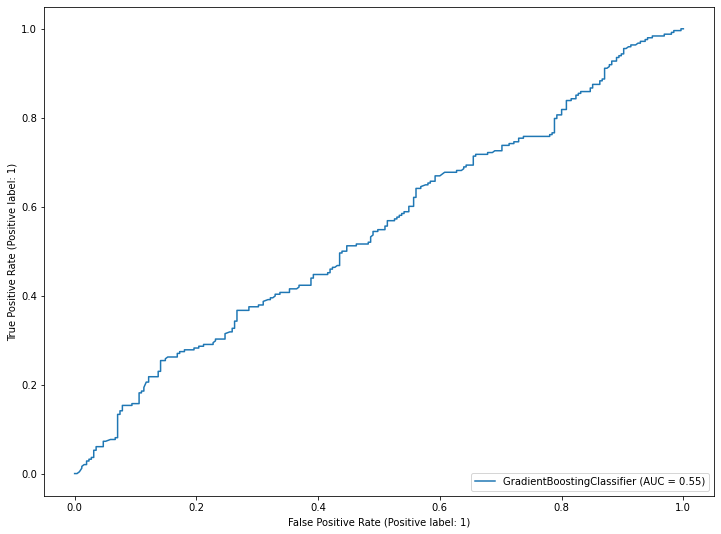

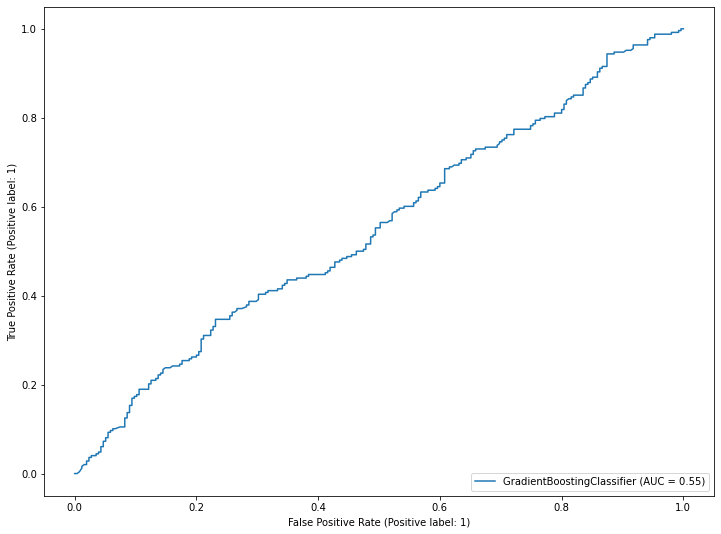

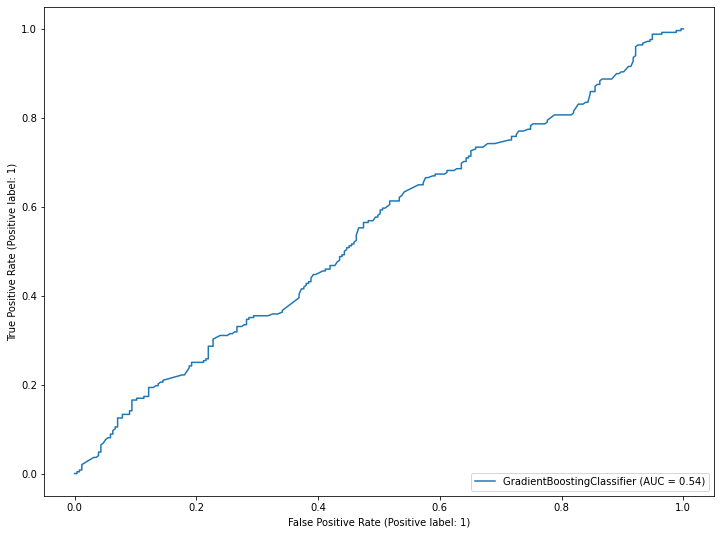

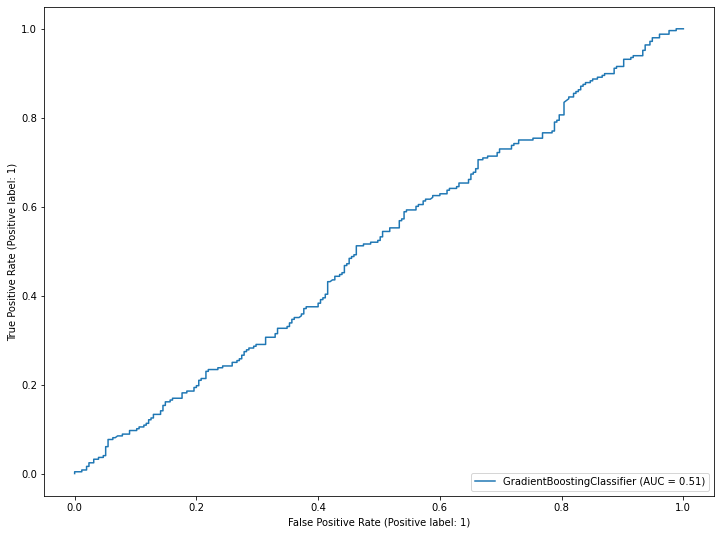

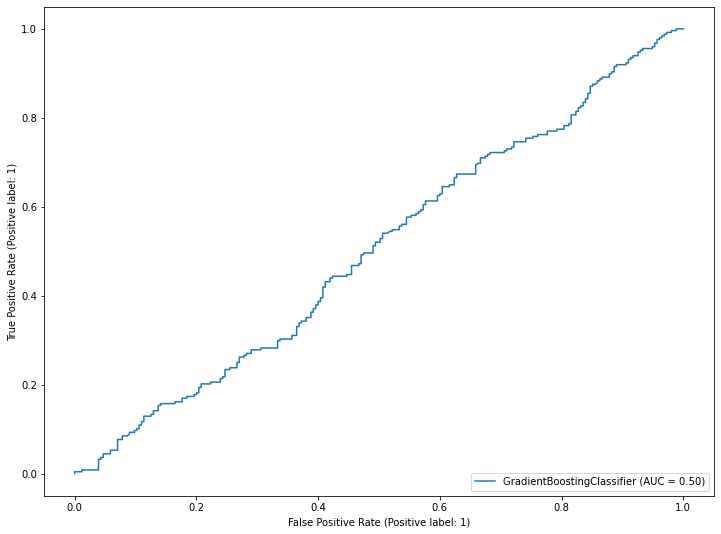

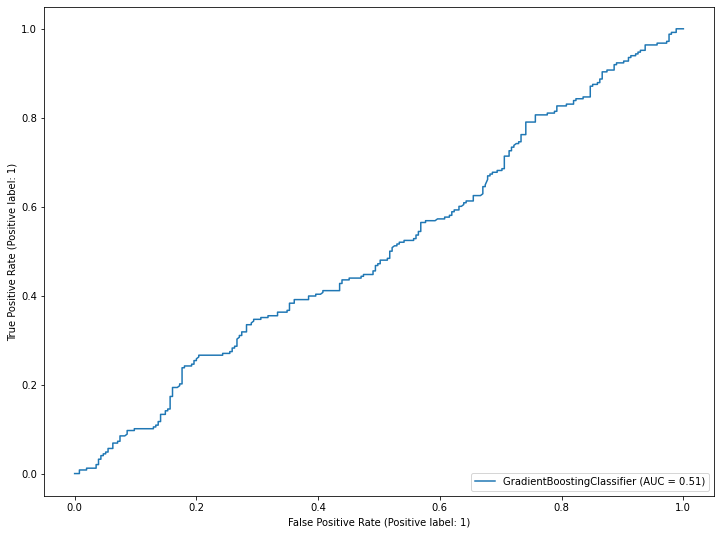

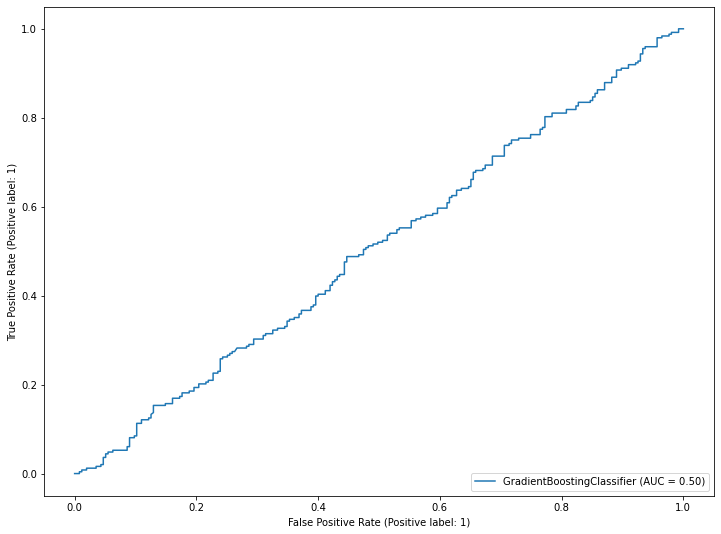

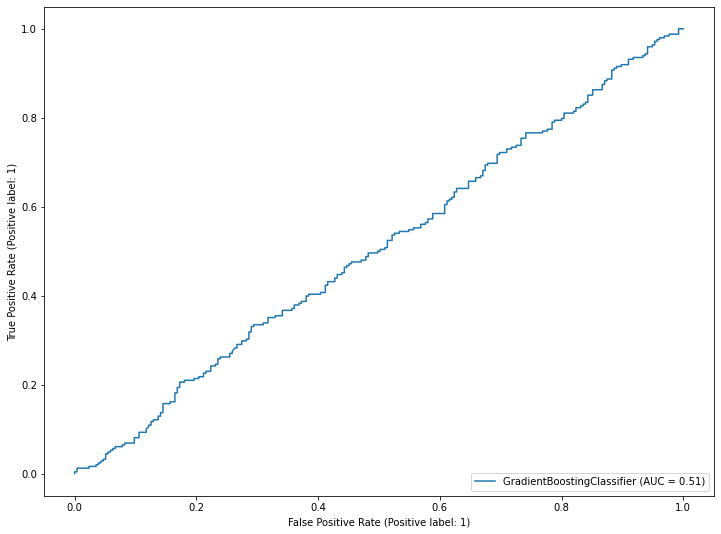

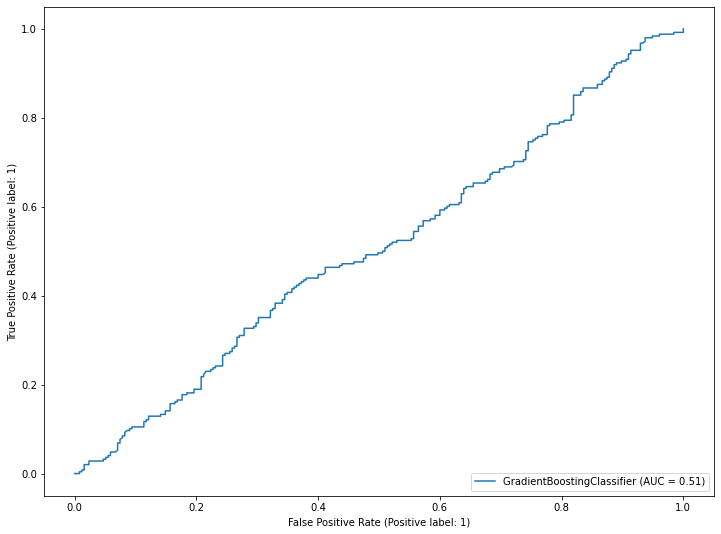

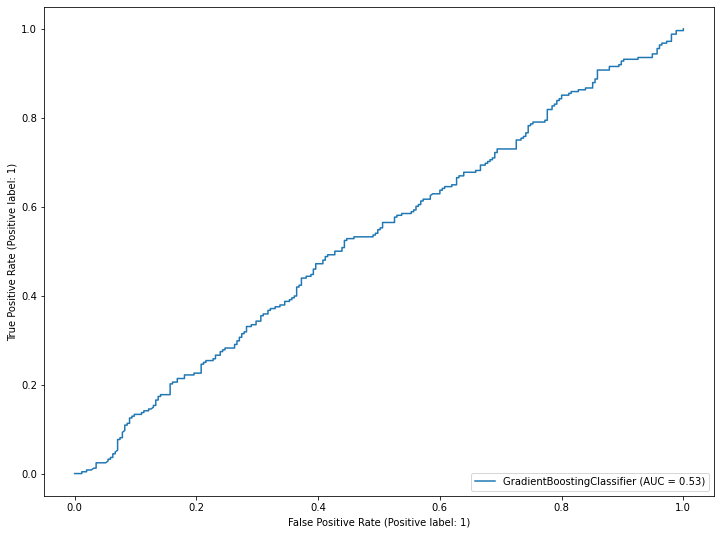

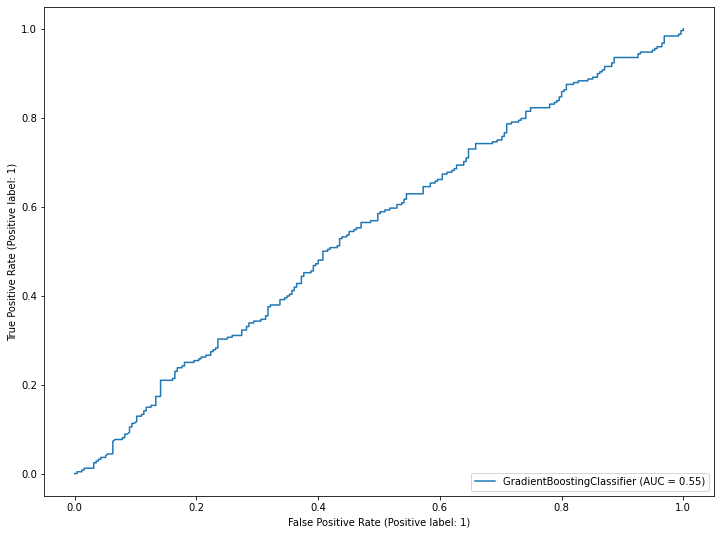

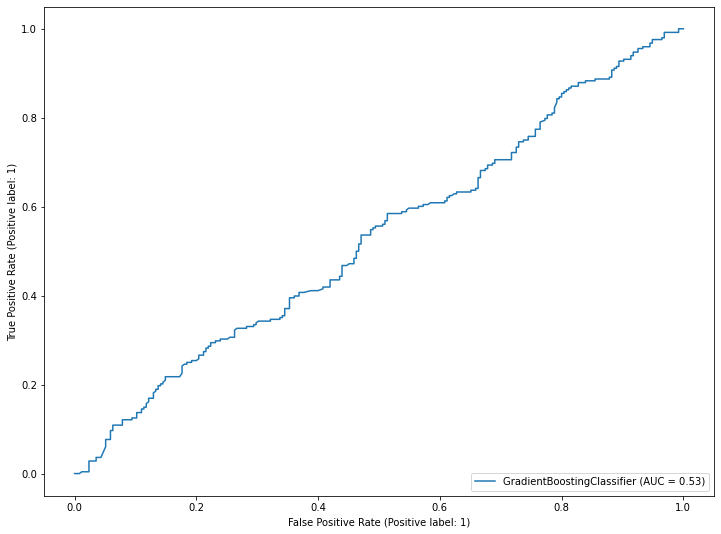

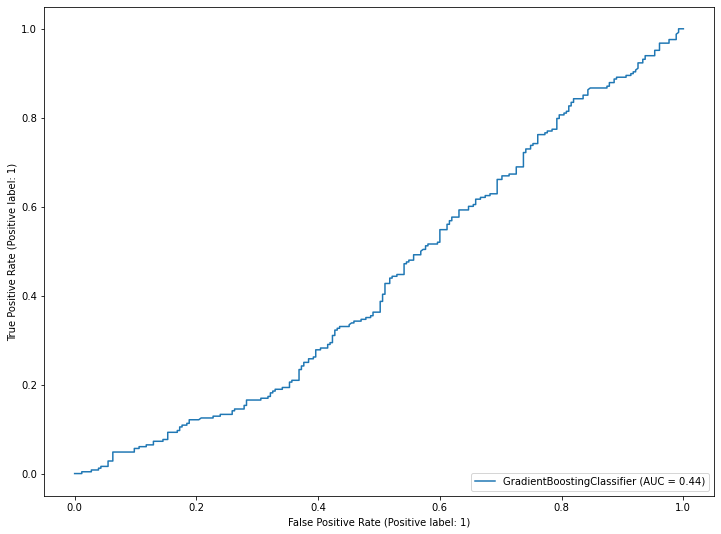

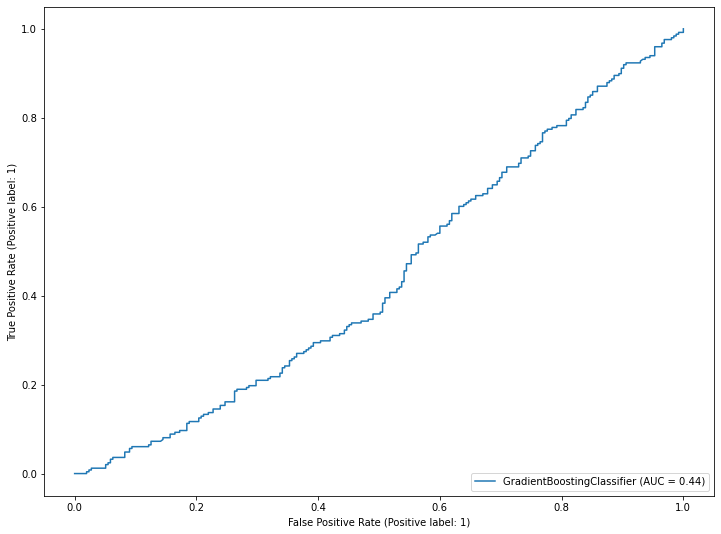

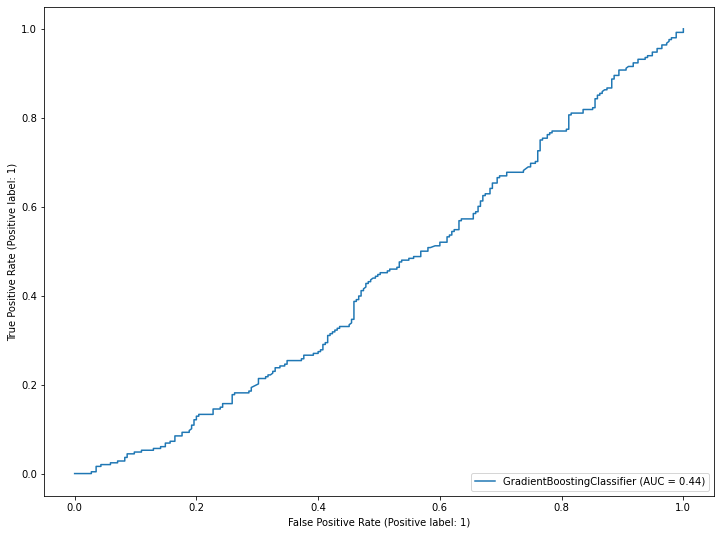

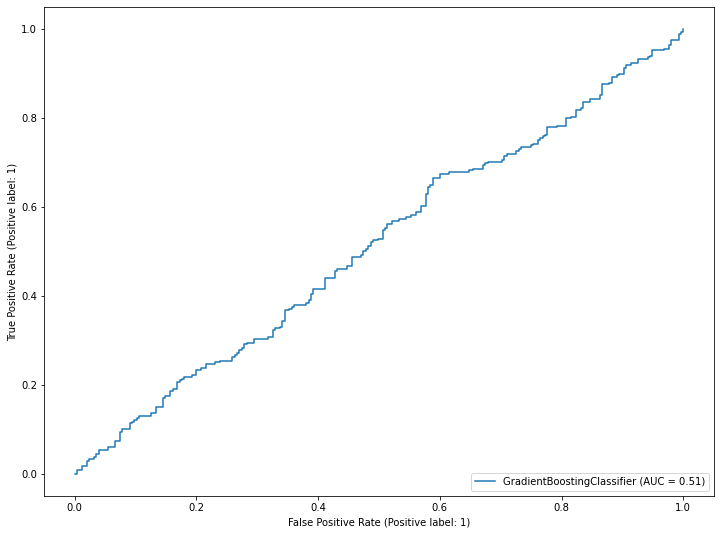

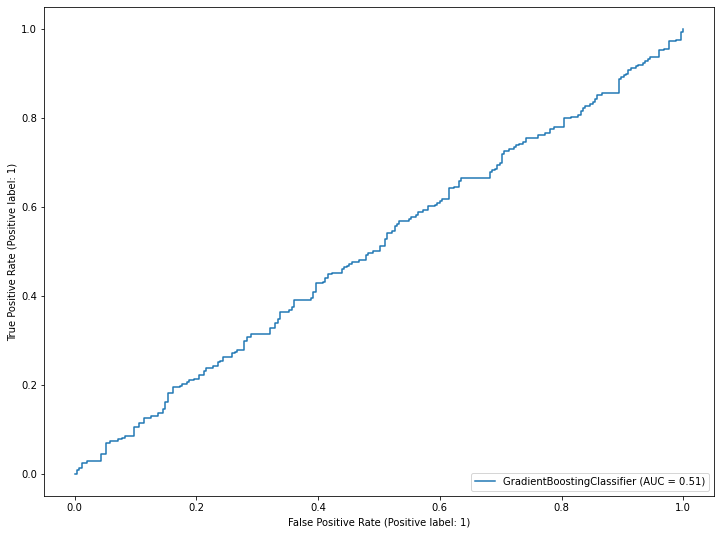

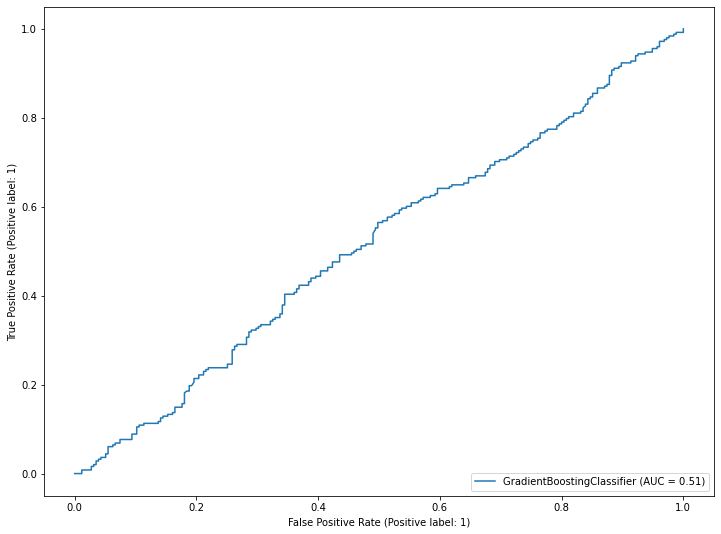

In [105]:
# from sklearn.metrics import auc
import time

st = time.time()
learning_rate_lst = [0.1, 1]
max_depth_lst = [3, 5, 7]
n_estimators_lst = [80, 100, 50]

for lr in learning_rate_lst:
    for md in max_depth_lst:
        for n_e in n_estimators_lst:
            gb = GradientBoostingClassifier(random_state=RANDOM_SEED, n_estimators=n_e, max_depth=md, learning_rate=lr)   
            gb.fit(X_train, y_train)
            print("Learning Rate: ", lr, "Max Depth: ", md, "N_estimators: ", n_e)
            plot_roc_curve(gb, X_val, y_val)
print(f"=============={time.time()-st}=============")

In [108]:
from sklearn.model_selection import GridSearchCV
param = {
    "learning_rate": [0.1, 1, 10],
    "max_depth": [3, 5],
    "n_estimators": [80, 100],
    
}
grid = GridSearchCV(gb, param_grid=param)

In [109]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=1, max_depth=7,
                                                  n_estimators=50,
                                                  random_state=42),
             param_grid={'learning_rate': [0.1, 1, 10], 'max_depth': [3, 5],
                         'n_estimators': [80, 100]})

In [110]:
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [114]:
grid.best_score_

0.5042868447860513

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
from sklearn.metrics import auc

auc(X_val, y_val)

ValueError: y should be a 1d array, got an array of shape (503, 10) instead.

## Conclusion
The gradient boosting classifier provided the best AUC score on the validation set. It is a common machine learning practice to train multiple models on the same train/validation data set and provide a model that works best. To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling plot_roc_curve with the test set instead of the validation one.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


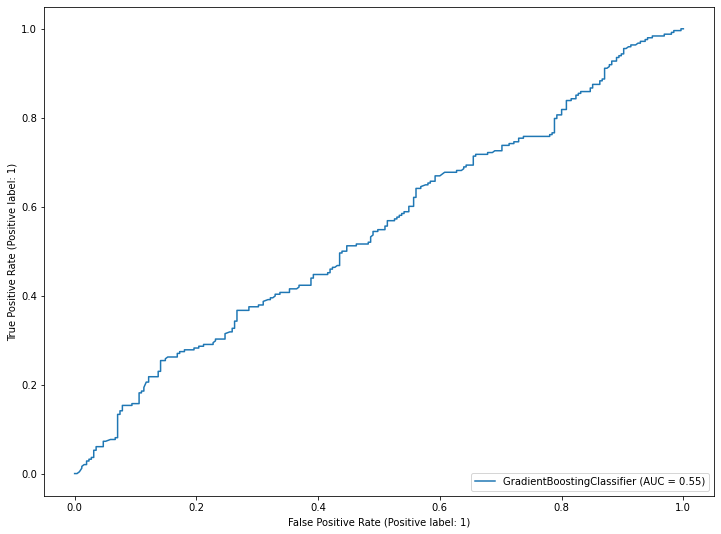

In [82]:
plot_roc_curve(gb, X_test, y_test)

In [62]:
importances

array([0.05992544, 0.05110567, 0.0504631 , 0.08334878, 0.19613049,
       0.04081105, 0.12976802, 0.11793014, 0.15928563, 0.11123168])

In [63]:
indices

array([4, 8, 6, 7, 9, 3, 0, 1, 2, 5])

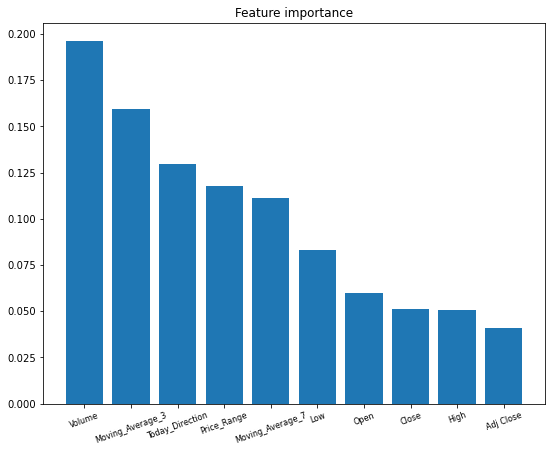

In [51]:
import numpy as np
# Calculate feature importances
importances = gb.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)

## Assignment

### 1. Feature Engineering
- `BBANDS`:               Bollinger Bands
- `EMA`:                  Exponential Moving Average
- `SMA`:                  Simple Moving Average
- `RSI`:                  Relative Strength Index
- `MACD`:                 Moving Average Convergence/Divergence


### 2. Model Hyper parameter tune
- Test different parameters for all of the discussed models

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


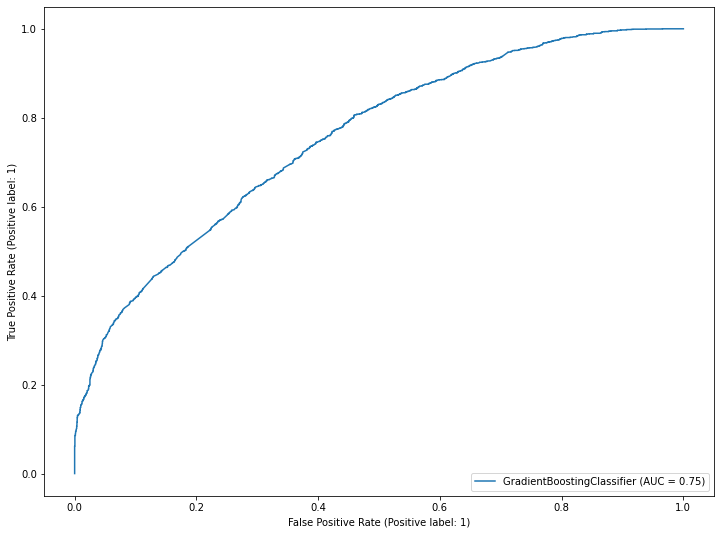

In [87]:
plot_roc_curve(gb, X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


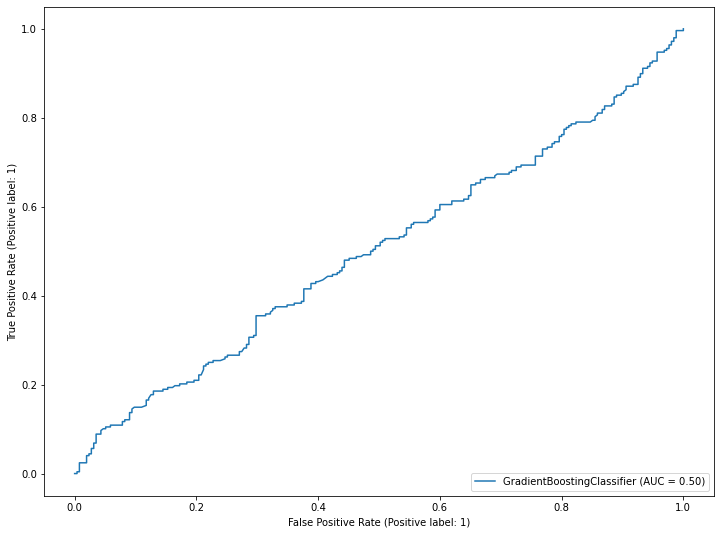

In [88]:
plot_roc_curve(gb, X_val, y_val)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


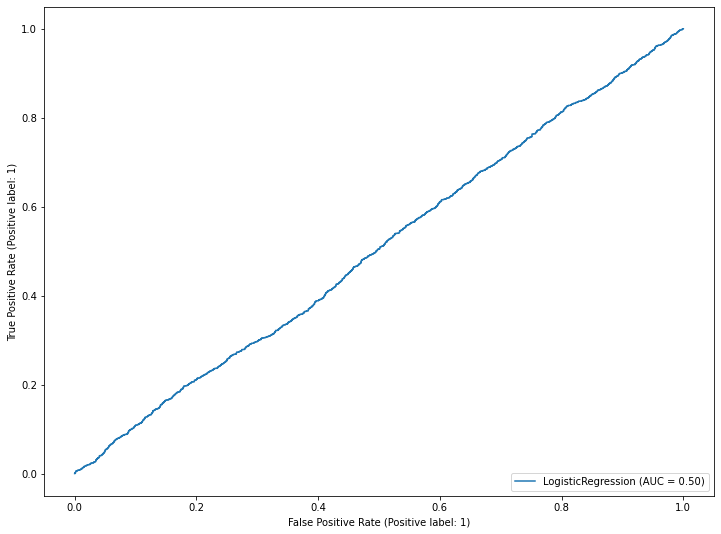

In [89]:
plot_roc_curve(lr, X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


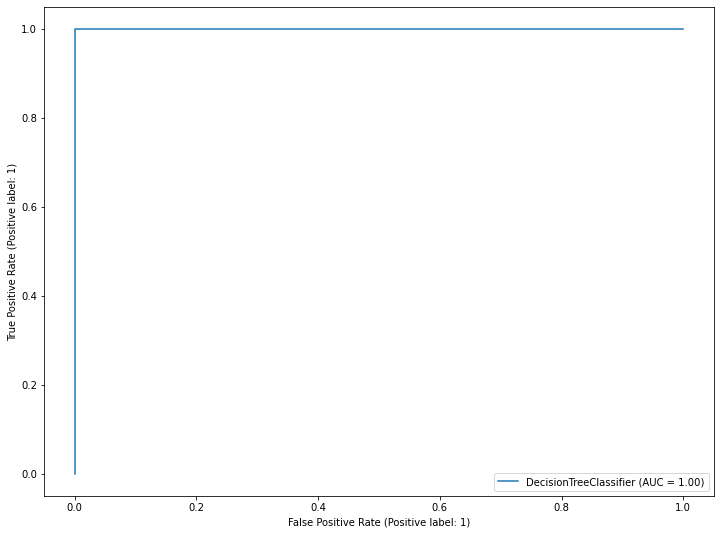

In [90]:
plot_roc_curve(dt, X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


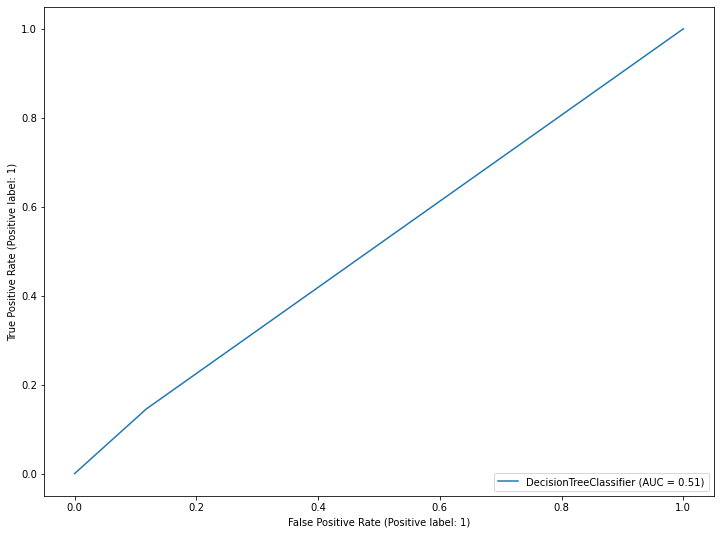

In [91]:
plot_roc_curve(dt, X_val, y_val)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


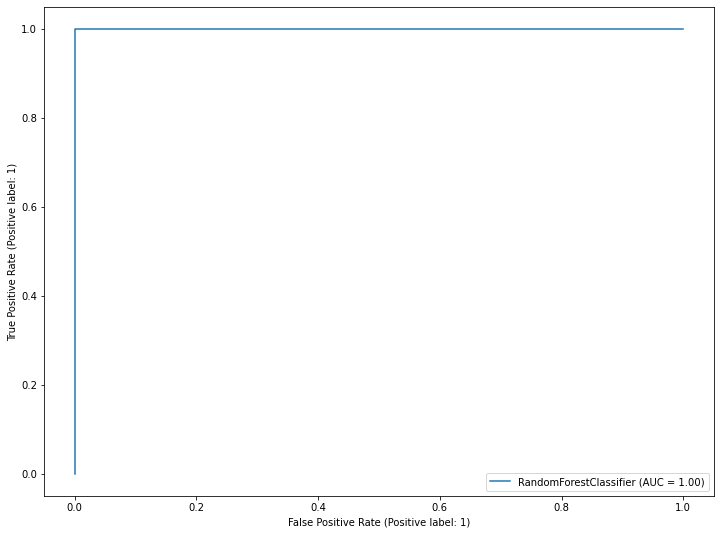

In [92]:
plot_roc_curve(rf, X_train, y_train)